Importing Required Libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

Import Dataset

In [19]:
df= pd.read_csv('Telco-Customer-Churn 1.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


EDA

In [20]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
columns = df.columns
print(columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [23]:
df[df['Churn'] == 'Yes'].count()

customerID          1869
gender              1869
SeniorCitizen       1869
Partner             1869
Dependents          1869
tenure              1869
PhoneService        1869
MultipleLines       1869
InternetService     1869
OnlineSecurity      1869
OnlineBackup        1869
DeviceProtection    1869
TechSupport         1869
StreamingTV         1869
StreamingMovies     1869
Contract            1869
PaperlessBilling    1869
PaymentMethod       1869
MonthlyCharges      1869
TotalCharges        1869
Churn               1869
dtype: int64

In [24]:
churned_cnt_based_on_is= df[df['Churn'] == 'Yes'].groupby('InternetService').size().reset_index(name='Churnedcount')
churned_cnt_based_on_is.head()

,InternetService,Churnedcount
0,DSL,459
1,Fiber optic,1297
2,No,113


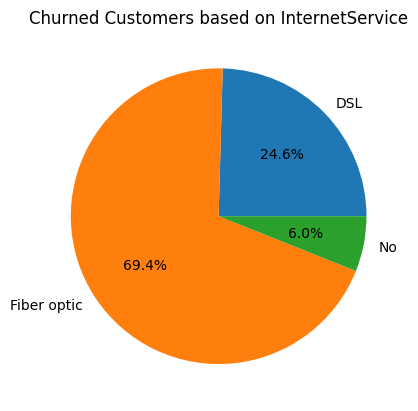

In [25]:
plt.pie(churned_cnt_based_on_is.Churnedcount,labels=churned_cnt_based_on_is.InternetService, autopct='%1.1f%%')
plt.title('Churned Customers based on InternetService')
plt.show()

In [26]:
churned_cnt_based_on_phone= df[df['Churn'] == 'Yes'].groupby('PhoneService').size().reset_index(name='Churnedcount')
churned_cnt_based_on_phone.head()

,PhoneService,Churnedcount
0,No,170
1,Yes,1699


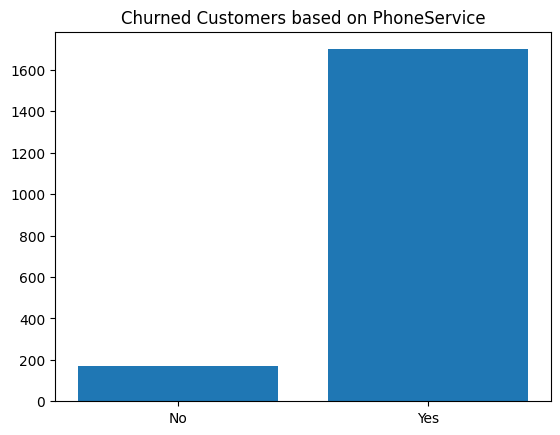

In [27]:
plt.bar(churned_cnt_based_on_phone.PhoneService,churned_cnt_based_on_phone.Churnedcount,)
plt.title('Churned Customers based on PhoneService')
plt.show()

In [28]:
churned_cnt_based_on_dependents= df.groupby(['Dependents','Churn']).size().unstack()
churned_cnt_based_on_dependents.head()

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1784,326


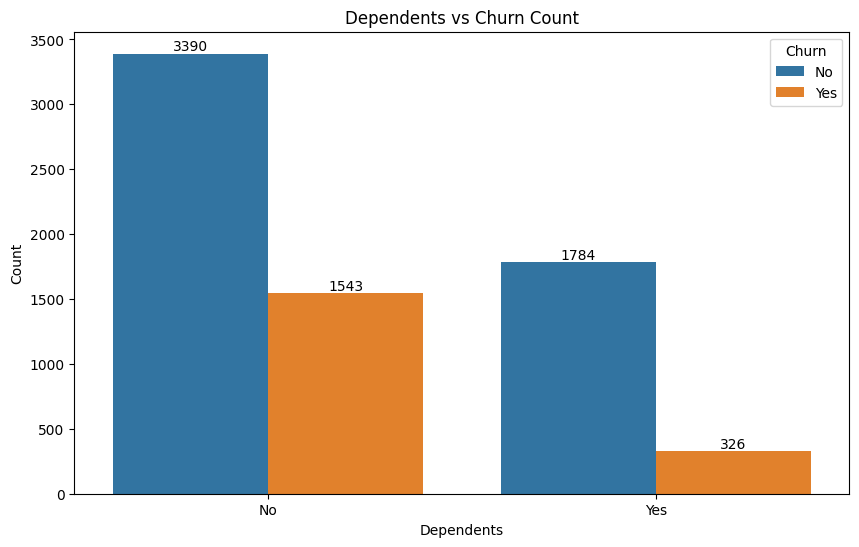

In [29]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Dependents', hue='Churn')
plt.title('Dependents vs Churn Count')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.legend(title='Churn')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [30]:
churned_cnt_based_on_mr= df.groupby(['TechSupport','Churn']).size().unstack()
churned_cnt_based_on_mr.head()

Churn,No,Yes
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


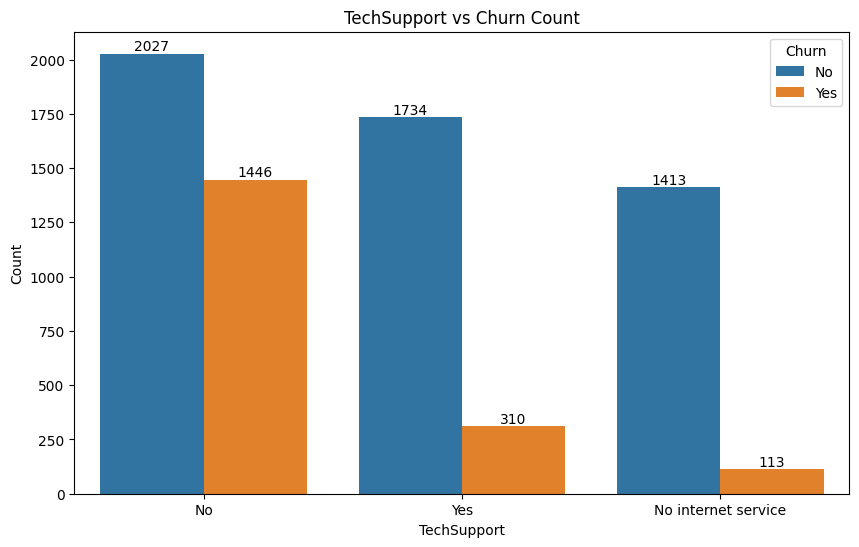

In [31]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='TechSupport', hue='Churn')
plt.title('TechSupport vs Churn Count')
plt.xlabel('TechSupport')
plt.ylabel('Count')
plt.legend(title='Churn')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [32]:
Churned_Customers_based_on_contract = df[df['Churn'] == 'Yes'].groupby('Contract').size().reset_index(name = 'ChurnedCount')
Churned_Customers_based_on_contract.head()

,Contract,ChurnedCount
0,Month-to-month,1655
1,One year,166
2,Two year,48


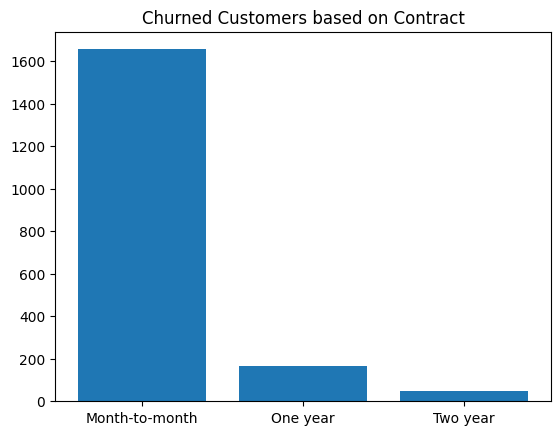

In [33]:
plt.bar(Churned_Customers_based_on_contract.Contract,Churned_Customers_based_on_contract.ChurnedCount)
plt.title('Churned Customers based on Contract')
plt.show()

In [34]:
churned_customers_based_on_services = df[df['Churn'] == 'Yes'].groupby('OnlineSecurity').size().reset_index(name = 'ChurnedCount')
churned_customers_based_on_services.head()

,OnlineSecurity,ChurnedCount
0,No,1461
1,No internet service,113
2,Yes,295


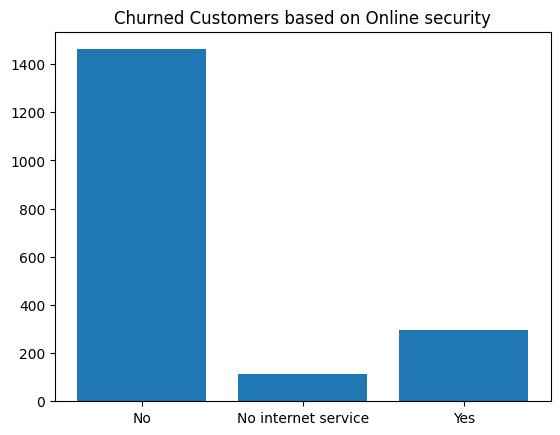

In [35]:
plt.bar(churned_customers_based_on_services.OnlineSecurity,churned_customers_based_on_services.ChurnedCount)
plt.title('Churned Customers based on Online security')
plt.show()


In [36]:
churned_customers_based_on_backup = df[df['Churn'] == 'Yes'].groupby('OnlineBackup').size().reset_index(name = 'ChurnedCount')
churned_customers_based_on_backup.head()


,OnlineBackup,ChurnedCount
0,No,1233
1,No internet service,113
2,Yes,523


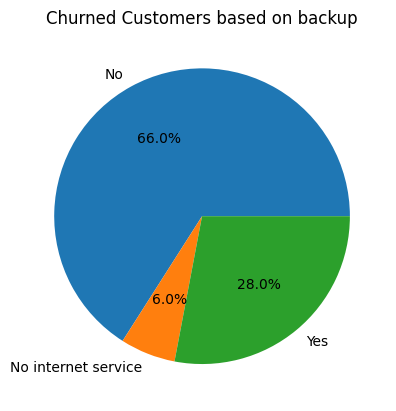

In [37]:
plt.pie(churned_customers_based_on_backup.ChurnedCount ,labels = churned_customers_based_on_backup.OnlineBackup , autopct='%1.1f%%')
plt.title('Churned Customers based on backup')
plt.show()

In [38]:
churned_customers_based_on_device_protection = df[df['Churn'] == 'Yes'].groupby('DeviceProtection').size().reset_index(name = 'ChurnedCount')
churned_customers_based_on_device_protection.head()


,DeviceProtection,ChurnedCount
0,No,1211
1,No internet service,113
2,Yes,545


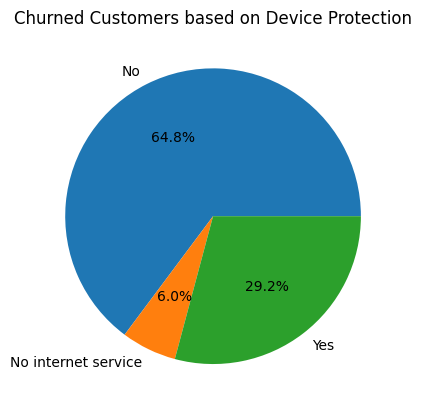

In [39]:
plt.pie(churned_customers_based_on_device_protection.ChurnedCount ,labels = churned_customers_based_on_device_protection.DeviceProtection , autopct='%1.1f%%')
plt.title('Churned Customers based on Device Protection')
plt.show()

In [40]:
counts_for_churns = df.groupby(['Churn']).size().reset_index(name = 'Count')
counts_for_churns.head()

,Churn,Count
0,No,5174
1,Yes,1869


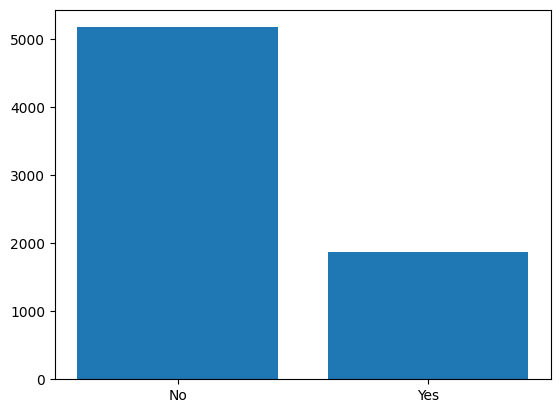

In [41]:
plt.bar(counts_for_churns.Churn,counts_for_churns.Count)
plt.show()


In [42]:
churned_customers_based_on_device_pm = df.groupby(['PaymentMethod','Churn']).size().unstack()
churned_customers_based_on_device_pm.head()

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


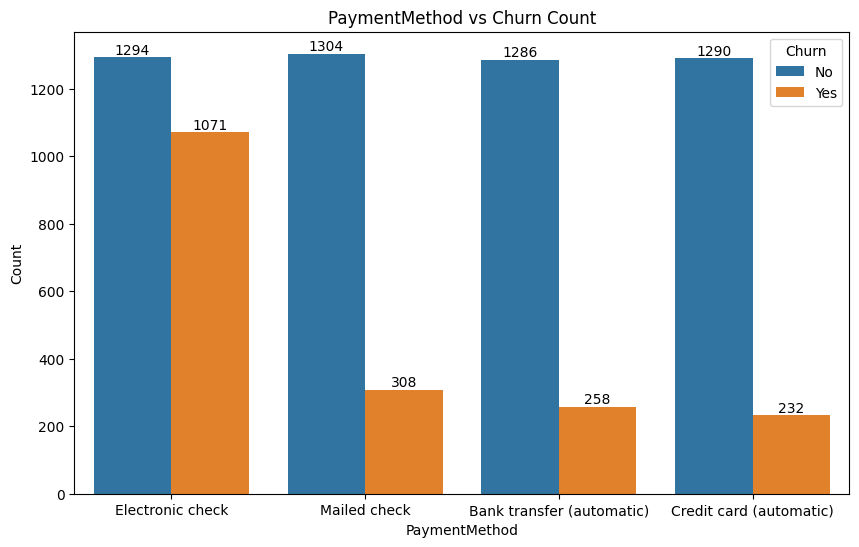

In [43]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('PaymentMethod vs Churn Count')
plt.xlabel('PaymentMethod')
plt.ylabel('Count')
plt.legend(title='Churn')
for container in ax.containers:
    ax.bar_label(container)

plt.show()


In [44]:
churned_customers_based_on_device_plb = df.groupby(['PaperlessBilling','Churn']).size().unstack()
churned_customers_based_on_device_plb.head()


Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


C:\Users\AdithyaKasturi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


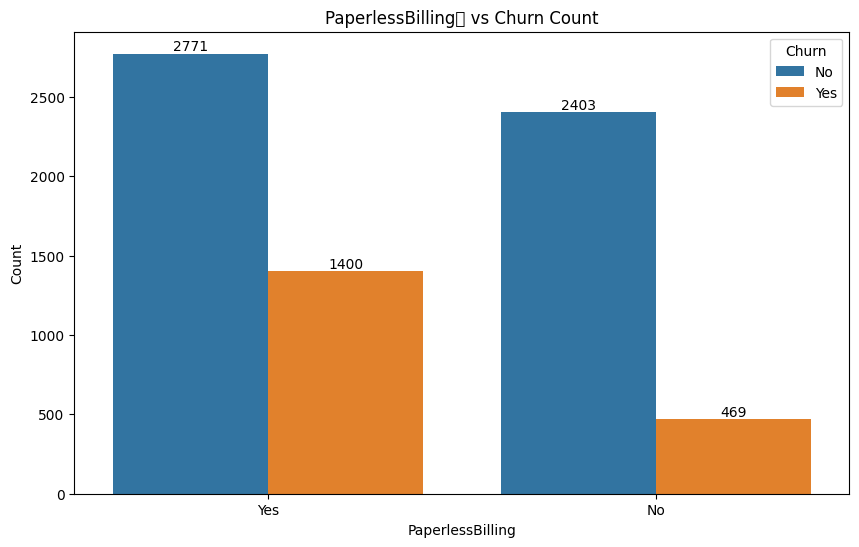

In [45]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='PaperlessBilling', hue='Churn')
plt.title('PaperlessBilling	 vs Churn Count')
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.legend(title='Churn')
for container in ax.containers:
    ax.bar_label(container)

plt.show()


Feature Engineering 

In [3]:
df.drop(columns="customerID", inplace=True)
df.replace("No phone service","No",inplace=True)
df.replace("No internet service","No",inplace=True)
df.replace("No",0,inplace=True)
df.replace("Yes",1,inplace=True)
df['gender'] = df['gender'].map({"Male": 0, "Female": 1})


C:\Users\AdithyaKasturi\AppData\Local\Temp\ipykernel_20468\3329289546.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("Yes",1,inplace=True)


In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [5]:
df = df.drop(["TotalCharges"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [6]:

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

                                         gender  SeniorCitizen   Partner  \
gender                                 1.000000       0.001874  0.001808   
SeniorCitizen                          0.001874       1.000000  0.016479   
Partner                                0.001808       0.016479  1.000000   
Dependents                            -0.010517      -0.211185  0.452676   
tenure                                -0.005106       0.016567  0.379697   
PhoneService                           0.006488       0.008576  0.017706   
MultipleLines                          0.008414       0.142948  0.142057   
OnlineSecurity                         0.017021      -0.038653  0.143106   
OnlineBackup                           0.013773       0.066572  0.141498   
DeviceProtection                       0.002105       0.059428  0.153786   
TechSupport                            0.009212      -0.060625  0.119999   
StreamingTV                            0.008393       0.105378  0.124666   
StreamingMov

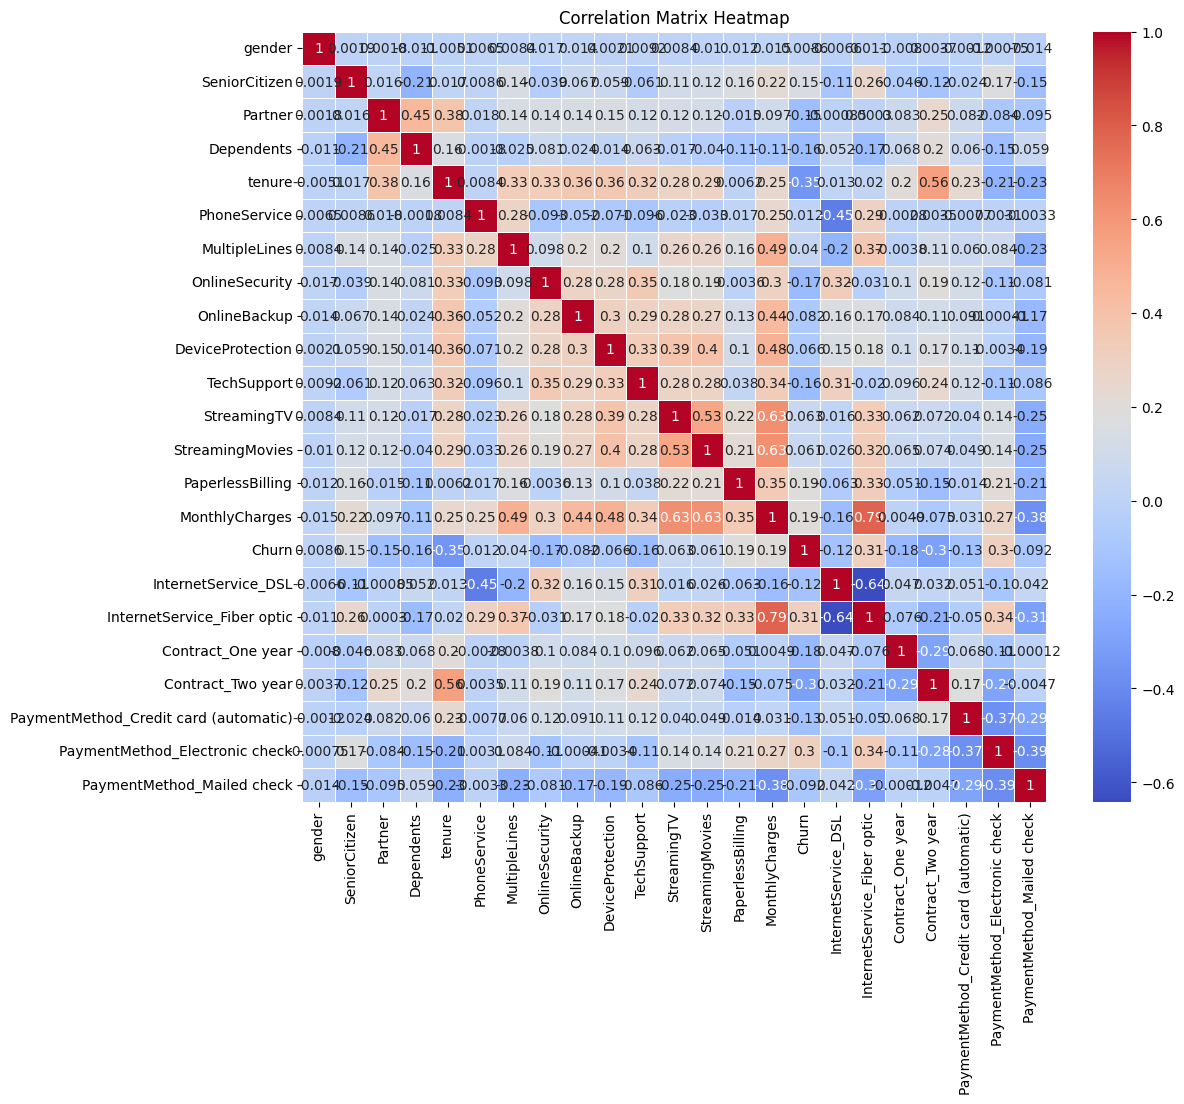

In [7]:
# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Display the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [8]:
df = df_encoded.copy()
df.drop(columns=["MonthlyCharges"], inplace=True, axis=1)

In [9]:
df.replace(False,0, inplace=True)
df.replace(True,1,inplace=True)

C:\Users\AdithyaKasturi\AppData\Local\Temp\ipykernel_20468\2325270616.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(True,1,inplace=True)


Model Training and Validation

In [10]:
X = df.drop("Churn", axis=1)
y = df.Churn

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42, stratify=y)
y_train.value_counts(), y_test.value_counts()

(Churn
 0    3622
 1    1308
 Name: count, dtype: int64,
 Churn
 0    1552
 1     561
 Name: count, dtype: int64)

In [13]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report


# Define hyperparameter grids
# svm_params = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto']
# }

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# logistic_params = {
#     'C': [0.1, 1, 10],
#     'penalty': ['l2'],
#     'solver': ['lbfgs', 'liblinear']
# }

# xgb_params = {
#     'learning_rate': [0.01, 0.1],
#     'n_estimators': [100, 200],
#     'max_depth': [3, 6],
#     'subsample': [0.8, 1.0]
# }

# lgbm_params = {
#     'learning_rate': [0.01, 0.1],
#     'n_estimators': [100, 200],
#     'num_leaves': [31, 50],
#     'max_depth': [-1, 10]
# }

# Initialize models
# svm_model = SVC(class_weight='balanced', probability=True)
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
# logistic_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# lgbm_model = LGBMClassifier(class_weight='balanced', random_state=42)

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search for each model
# svm_grid = GridSearchCV(svm_model, svm_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
rf_grid = GridSearchCV(rf_model, rf_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
# logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
# xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
# lgbm_grid = GridSearchCV(lgbm_model, lgbm_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)

# Fit the models
# svm_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
# logistic_grid.fit(X_train, y_train)
# xgb_grid.fit(X_train, y_train)
# lgbm_grid.fit(X_train, y_train)

# Evaluate the best model from each grid search
models = {
    # 'SVM': svm_grid,
    'Random Forest': rf_grid,
    # 'Logistic Regression': logistic_grid,
    # 'XGBoost': xgb_grid,
    # 'LightGBM': lgbm_grid
}

for model_name, grid in models.items():
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1552
           1       0.55      0.74      0.63       561

    accuracy                           0.77      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.77      0.78      2113



SHAP Summary Plot for Random Forest


<Figure size 640x480 with 0 Axes>

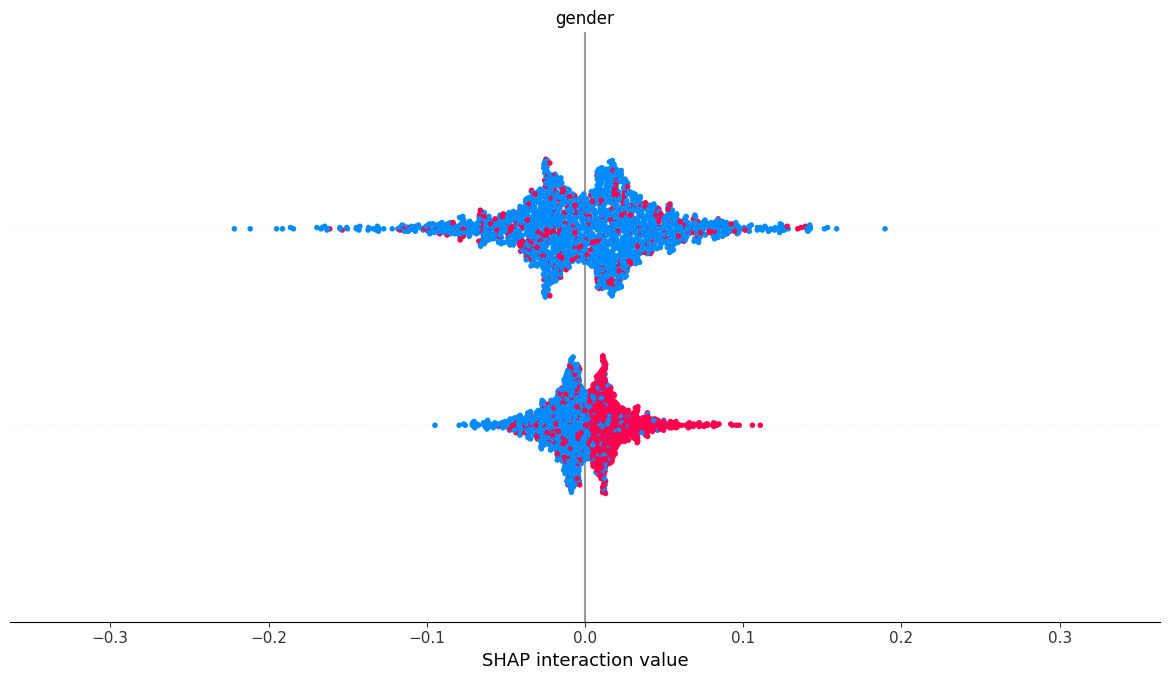

In [ ]:
import shap
import matplotlib.pyplot as plt

# Initialize SHAP TreeExplainer for the Random Forest model
explainer_rf = shap.TreeExplainer(rf_grid.best_estimator_)

# Calculate SHAP values for the test set
shap_values_rf = explainer_rf.shap_values(X_test)

# Plot SHAP summary plot for Random Forest
print("SHAP Summary Plot for Random Forest")
shap.summary_plot(shap_values_rf, X_test, plot_type="bar", feature_names=X.columns)

# Optional: SHAP dependence plot for a specific feature
# Replace 'feature_name' with the name of the feature you want to analyze
# shap.dependence_plot('feature_name', shap_values_rf[1], X_test, feature_names=X.columns)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Create the SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

In [ ]:
print("SHAP Waterfall Plot for Random Forest (First Prediction)")
shap.plots.waterfall(shap_values_rf[0])

array([[[-0.00552959,  0.00552959],
        [-0.00037388,  0.00037388],
        [ 0.00953549, -0.00953549],
        ...,
        [-0.00620628,  0.00620628],
        [ 0.01699808, -0.01699808],
        [-0.01303773,  0.01303773]],

       [[ 0.00766224, -0.00766224],
        [-0.00161625,  0.00161625],
        [-0.02926244,  0.02926244],
        ...,
        [-0.01834188,  0.01834188],
        [ 0.00830521, -0.00830521],
        [-0.0243586 ,  0.0243586 ]],

       [[-0.04269946,  0.04269946],
        [-0.02514051,  0.02514051],
        [-0.01410706,  0.01410706],
        ...,
        [-0.0220422 ,  0.0220422 ],
        [-0.01220643,  0.01220643],
        [-0.01634839,  0.01634839]],

       ...,

       [[-0.00014602,  0.00014602],
        [ 0.00061707, -0.00061707],
        [-0.01273178,  0.01273178],
        ...,
        [-0.0211584 ,  0.0211584 ],
        [ 0.01740092, -0.01740092],
        [-0.02831743,  0.02831743]],

       [[-0.01571598,  0.01571598],
        [-0.00099801,  0.00

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Define hyperparameter grids
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# logistic_params = {
#     'C': [0.1, 1, 10],
#     'penalty': ['l2'],
#     'solver': ['lbfgs', 'liblinear']
# }

# xgb_params = {
#     'learning_rate': [0.01, 0.1],
#     'n_estimators': [100, 200],
#     'max_depth': [3, 6],
#     'subsample': [0.8, 1.0]
# }

lgbm_params = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'num_leaves': [31, 50],
    'max_depth': [-1, 10]
}

# Initialize models
svm_model = SVC( probability=True)
rf_model = RandomForestClassifier( random_state=42)
# logistic_model = LogisticRegression( random_state=42, max_iter=1000)
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm_model = LGBMClassifier( random_state=42)

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search for each model
svm_grid = GridSearchCV(svm_model, svm_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
rf_grid = GridSearchCV(rf_model, rf_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
# logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
# xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
lgbm_grid = GridSearchCV(lgbm_model, lgbm_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)

# Fit the models
svm_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
# logistic_grid.fit(X_train, y_train)
# xgb_grid.fit(X_train, y_train)
lgbm_grid.fit(X_train, y_train)

# Evaluate the best model from each grid search
models = {
    'SVM': svm_grid,
    'Random Forest': rf_grid,
    # 'Logistic Regression': logistic_grid,
    # 'XGBoost': xgb_grid,
    'LightGBM': lgbm_grid
}

for model_name, grid in models.items():
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 113
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1035
           1       0.78     

GridSearchCV(cv=LeaveOneOut(),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [ ]:
from sklearn.model_selection import GridSearchCV, LeaveOneOut, train_test_split

loo = LeaveOneOut()

svm_grid = GridSearchCV(svm_model, svm_params, cv=loo, scoring='f1', n_jobs=-1, verbose=1)
rf_grid = GridSearchCV(rf_model, rf_params, cv=loo, scoring='f1', n_jobs=-1, verbose=1)
lgbm_grid = GridSearchCV(lgbm_model, lgbm_params, cv=loo, scoring='f1', n_jobs=-1, verbose=1)

# Fit the models
svm_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
lgbm_grid.fit(X_train, y_train)

# Evaluate the best model from each grid search
models = {
    'SVM': svm_grid,
    'Random Forest': rf_grid,
    'LightGBM': lgbm_grid
}

for model_name, grid in models.items():
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")

Fitting 8278 folds for each of 12 candidates, totalling 99336 fits


KeyboardInterrupt: 

In [ ]:
import shap
import matplotlib.pyplot as plt

# Initialize SHAP TreeExplainer for the Random Forest model
explainer_rf = shap.TreeExplainer(rf_grid.best_estimator_)

# Calculate SHAP values for the test set
shap_values_rf = explainer_rf.shap_values(X_test)

# Plot SHAP summary plot for Random Forest
print("SHAP Summary Plot for Random Forest")
shap.summary_plot(shap_values_rf, X_test, plot_type="bar", feature_names=X.columns)

# Optional: SHAP dependence plot for a specific feature
# Replace 'feature_name' with the name of the feature you want to analyze
# shap.dependence_plot('feature_name', shap_values_rf[1], X_test, feature_names=X.columns)

c:\Users\NatarajanKumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'